# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




 Salifort Motors leadership team

 A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure.



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
...                      ...     ...            ...   ...   
14994                    151       3              0     1   
14995                    160       3              0     1   
14996                    143       3              0     1   
14997                    280       4              0     1   
14998                    158       3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

<Axes: xlabel='tenure'>

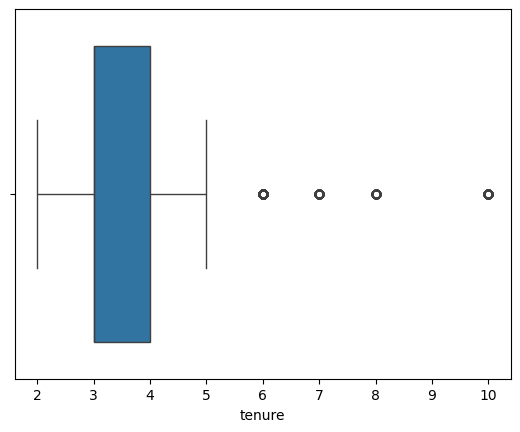

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df['tenure'], orient='h')


In [13]:
# Determine the number of rows containing outliers
percentil25 = df['tenure'].quantile(0.25)
percentil75 = df['tenure'].quantile(0.75)
iqr = percentil75 - percentil25
up_lim = percentil75 + (iqr*1.5)
lw_lim = percentil25 - (iqr*1.5)

outliers = df[(df['tenure'] < lw_lim)|(df['tenure'] > up_lim)]
len(outliers)

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
df['left'].value_counts(normalize=True)


left
0    10000
1     1991
Name: count, dtype: int64


left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [15]:
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

In [16]:
# Histogramer
def histogrammer(column_str, median = False, median_text=False, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(10,5))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    if median == True:
        plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    elif median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram')
    

In [17]:
#Boxplotter
def boxplotter(column_str, data=None, **kwargs):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data, x=column_str, **kwargs)  # Plot the boxplot
    plt.title(f'{column_str} boxplot')

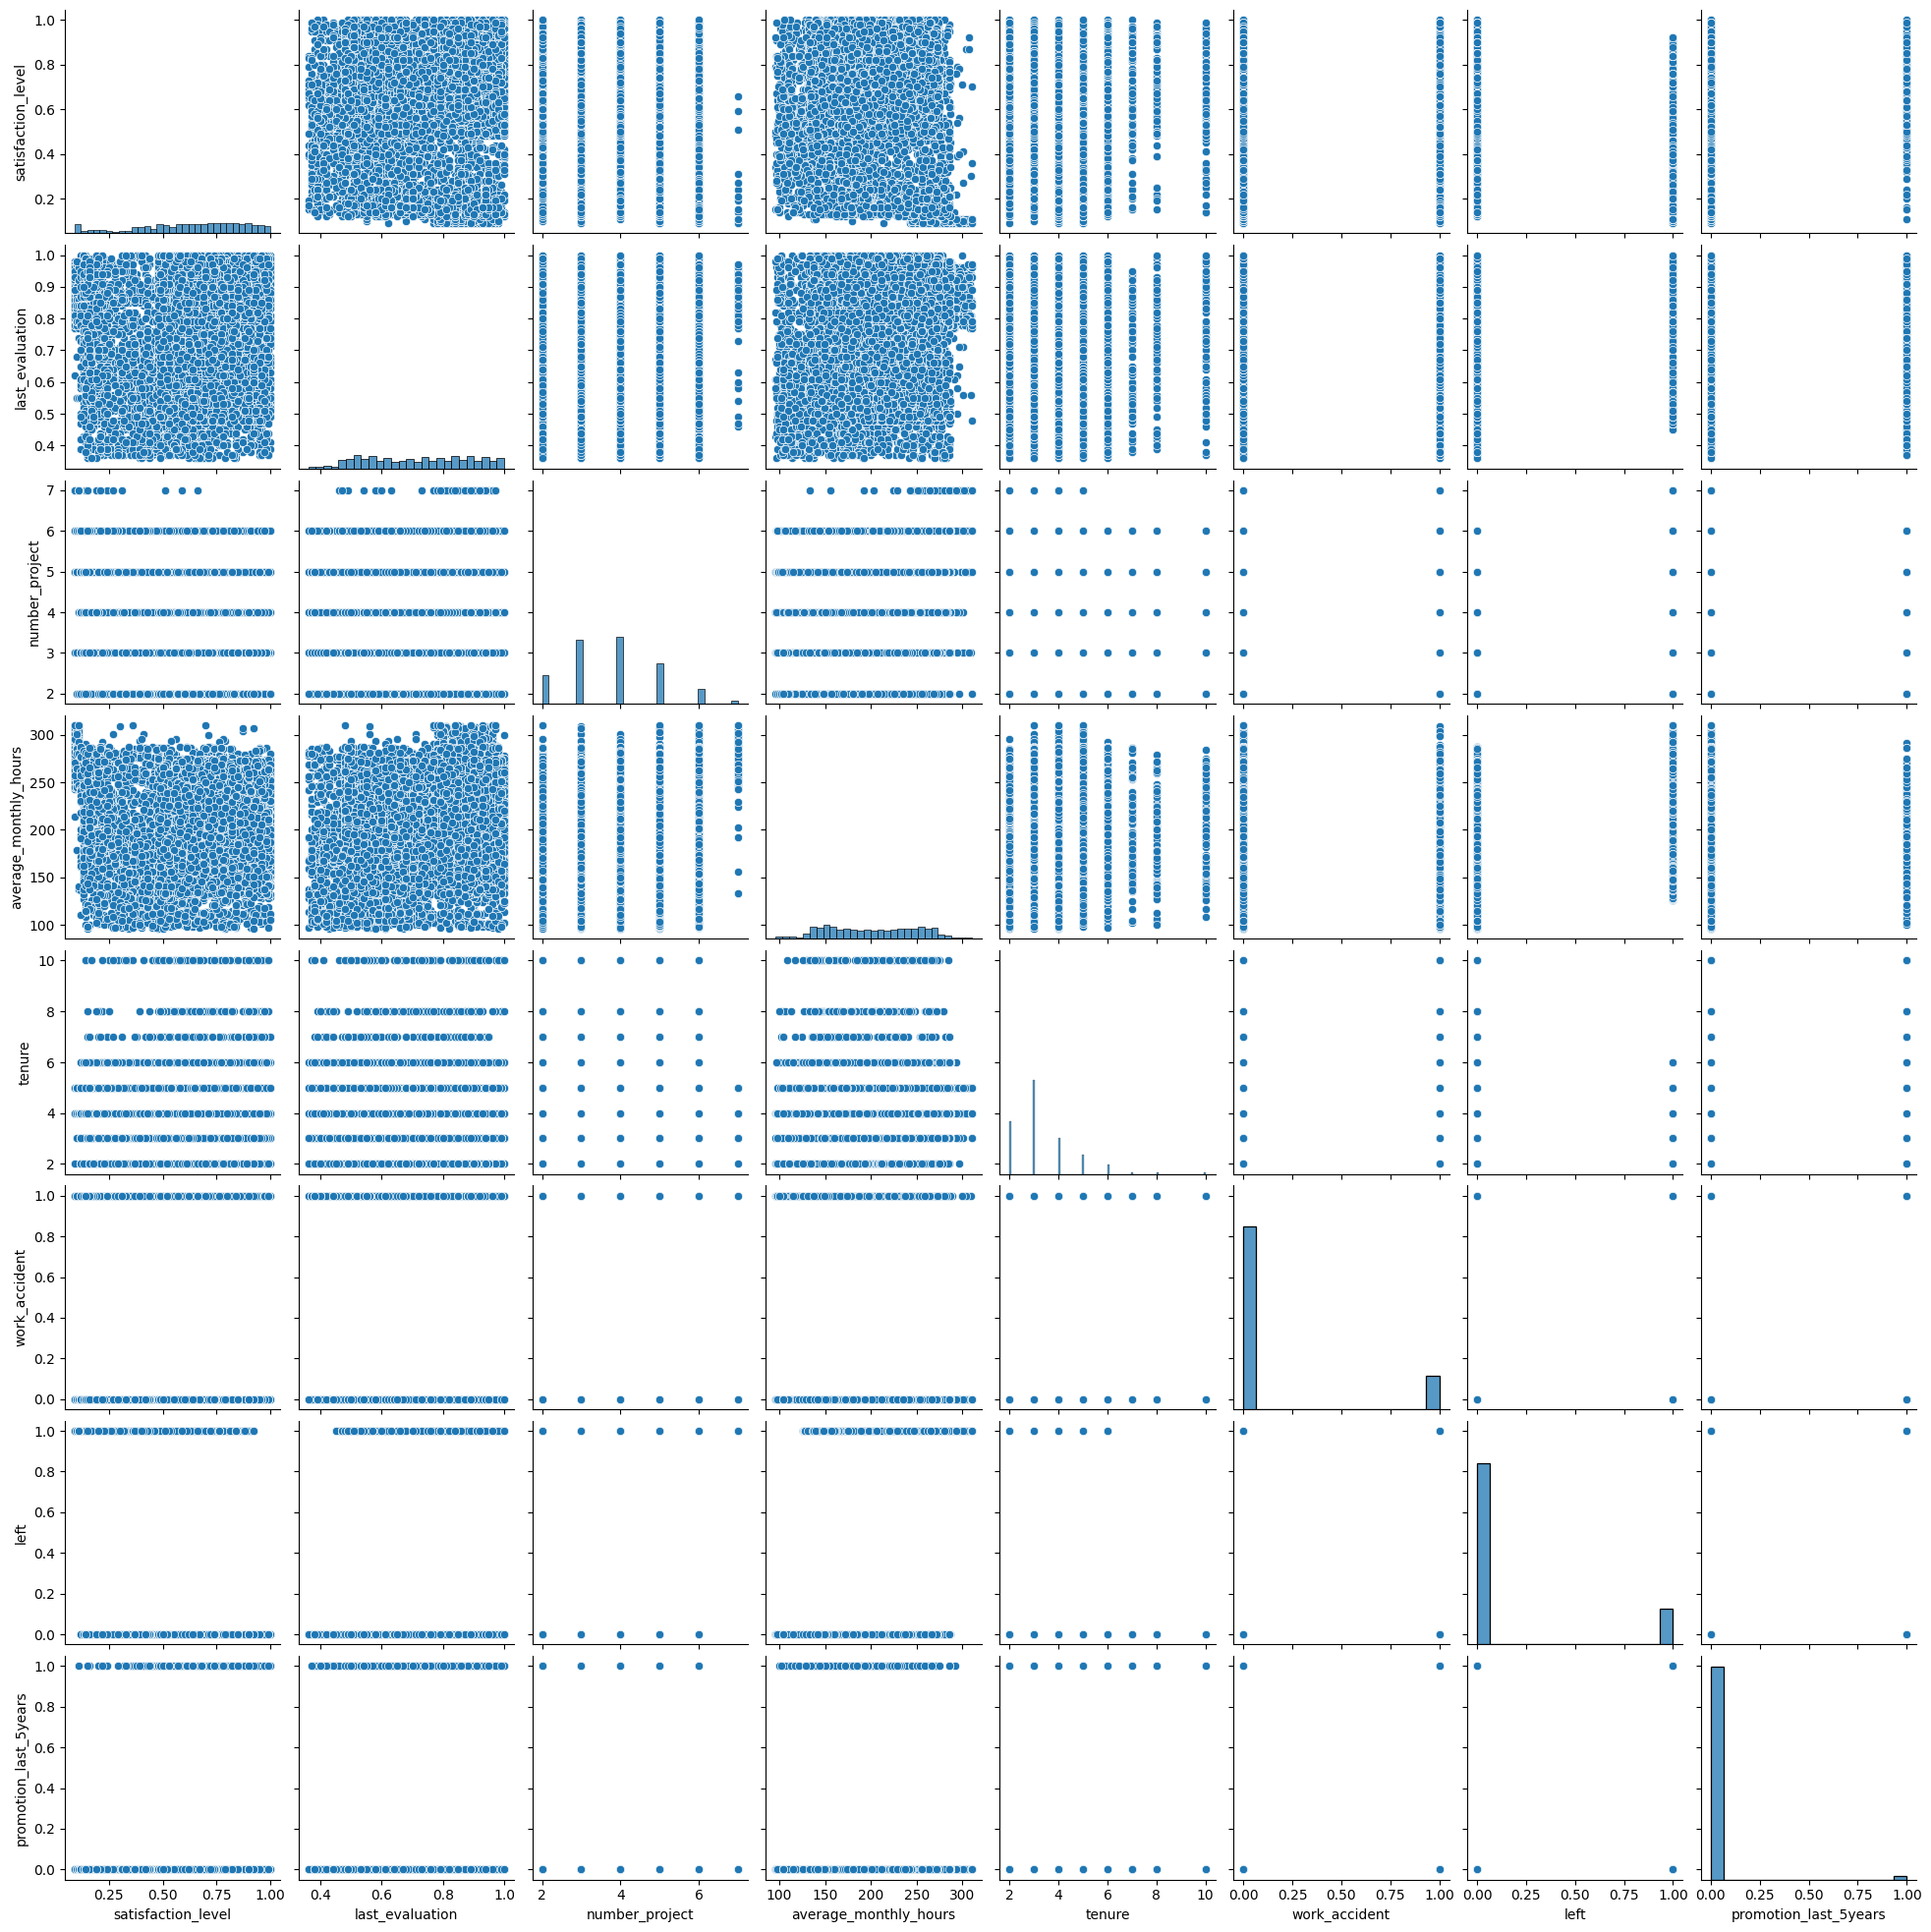

In [18]:
#Pairplot
sns.pairplot(df)

<Axes: >

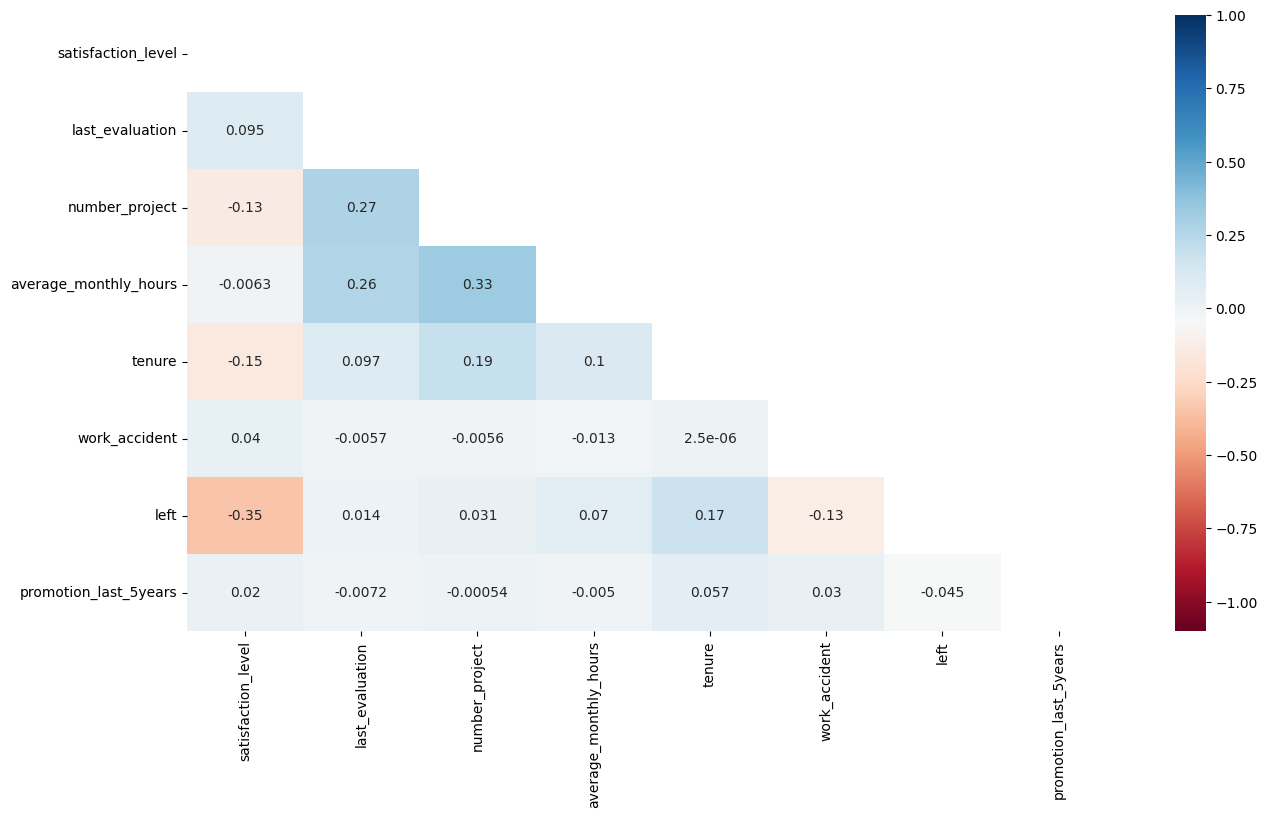

In [19]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))
plt.figure(figsize=(15,8))
sns.heatmap(numeric_df.corr(), mask=mask, vmin=1, vmax=-1, annot=True, cmap="RdBu")

Median: 200.0


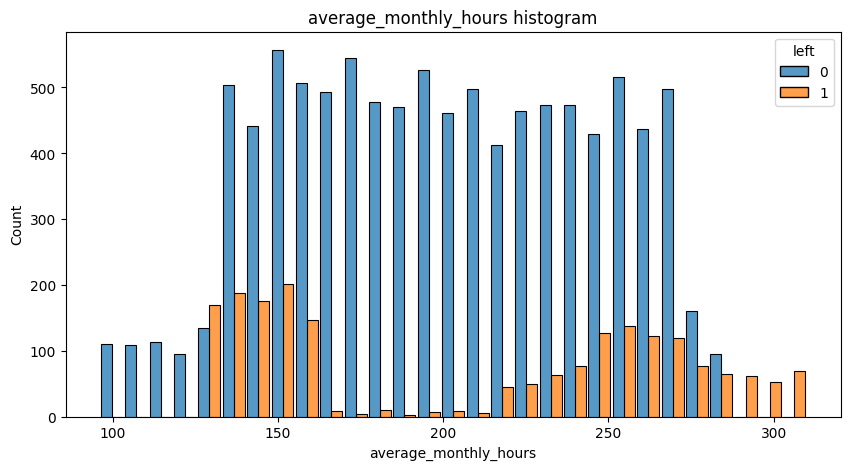

In [20]:
# Create a plot as needed
histogrammer('average_monthly_hours', data = df, hue='left', multiple='dodge', shrink=0.9, median=True)

Median: 4.0


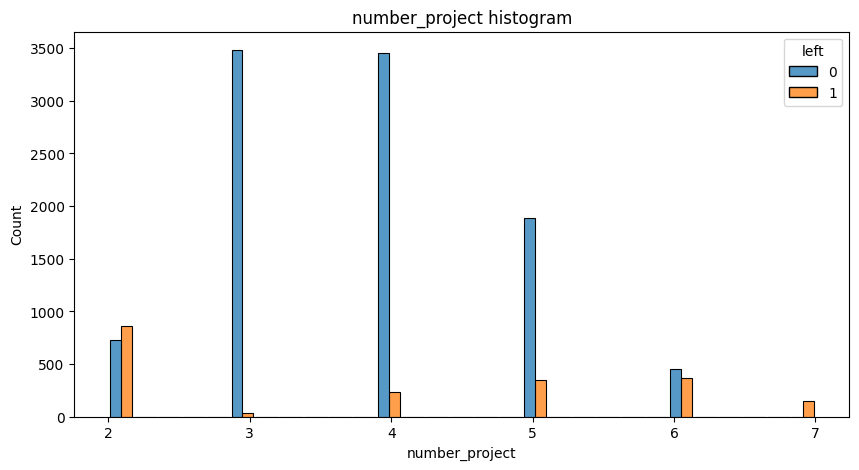

In [21]:
# Create a plot as needed
histogrammer('number_project', data = df, hue='left', multiple='dodge', shrink=0.9, median=True)

Median: 0.0


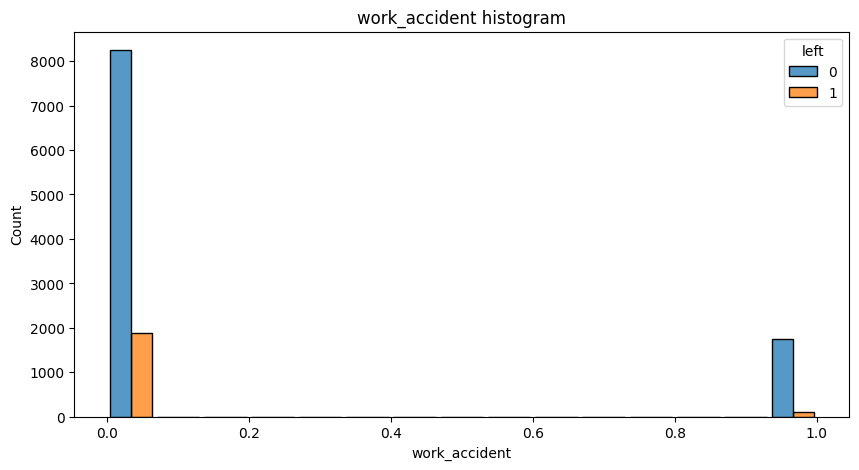

In [22]:
# Create a plot as needed
histogrammer('work_accident', data = df, hue='left', multiple='dodge', shrink=0.9, median=True)

Median: 0.0


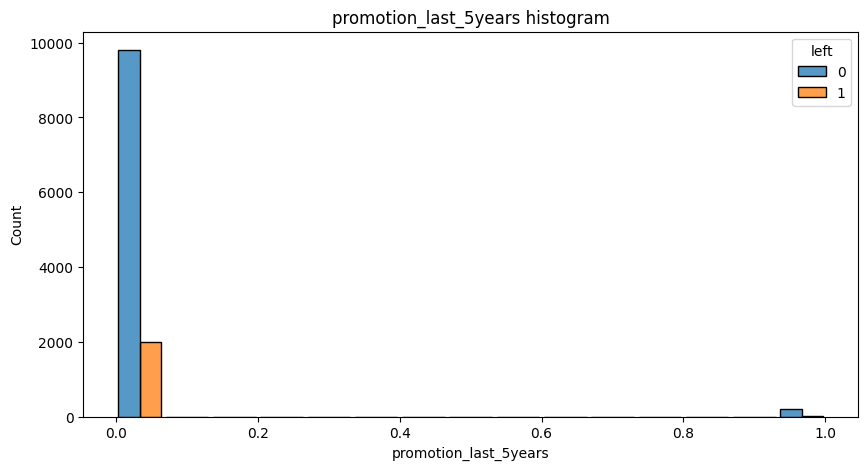

In [23]:
histogrammer('promotion_last_5years', data = df, hue='left', multiple='dodge', shrink=0.9, median=True)

In [24]:
df['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

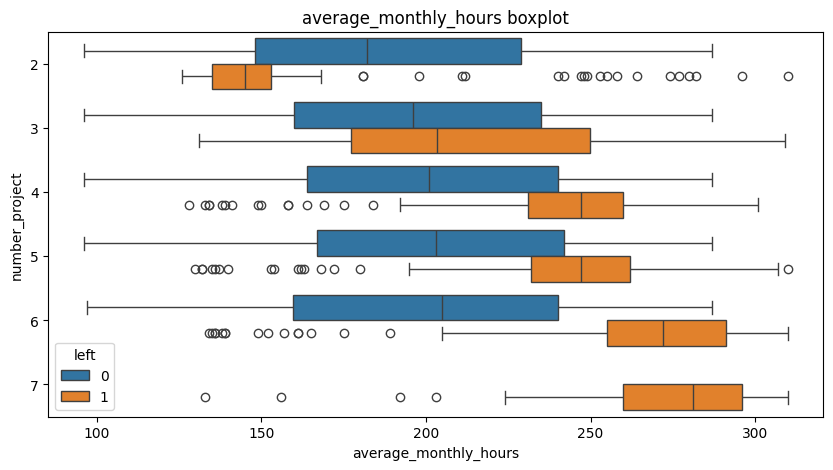

In [25]:
# Create a plot as needed
boxplotter('average_monthly_hours', data=df, y='number_project', hue='left', orient="h")

Text(0.5, 1.0, 'average_monthly_hours_vs_satisfaction_level')

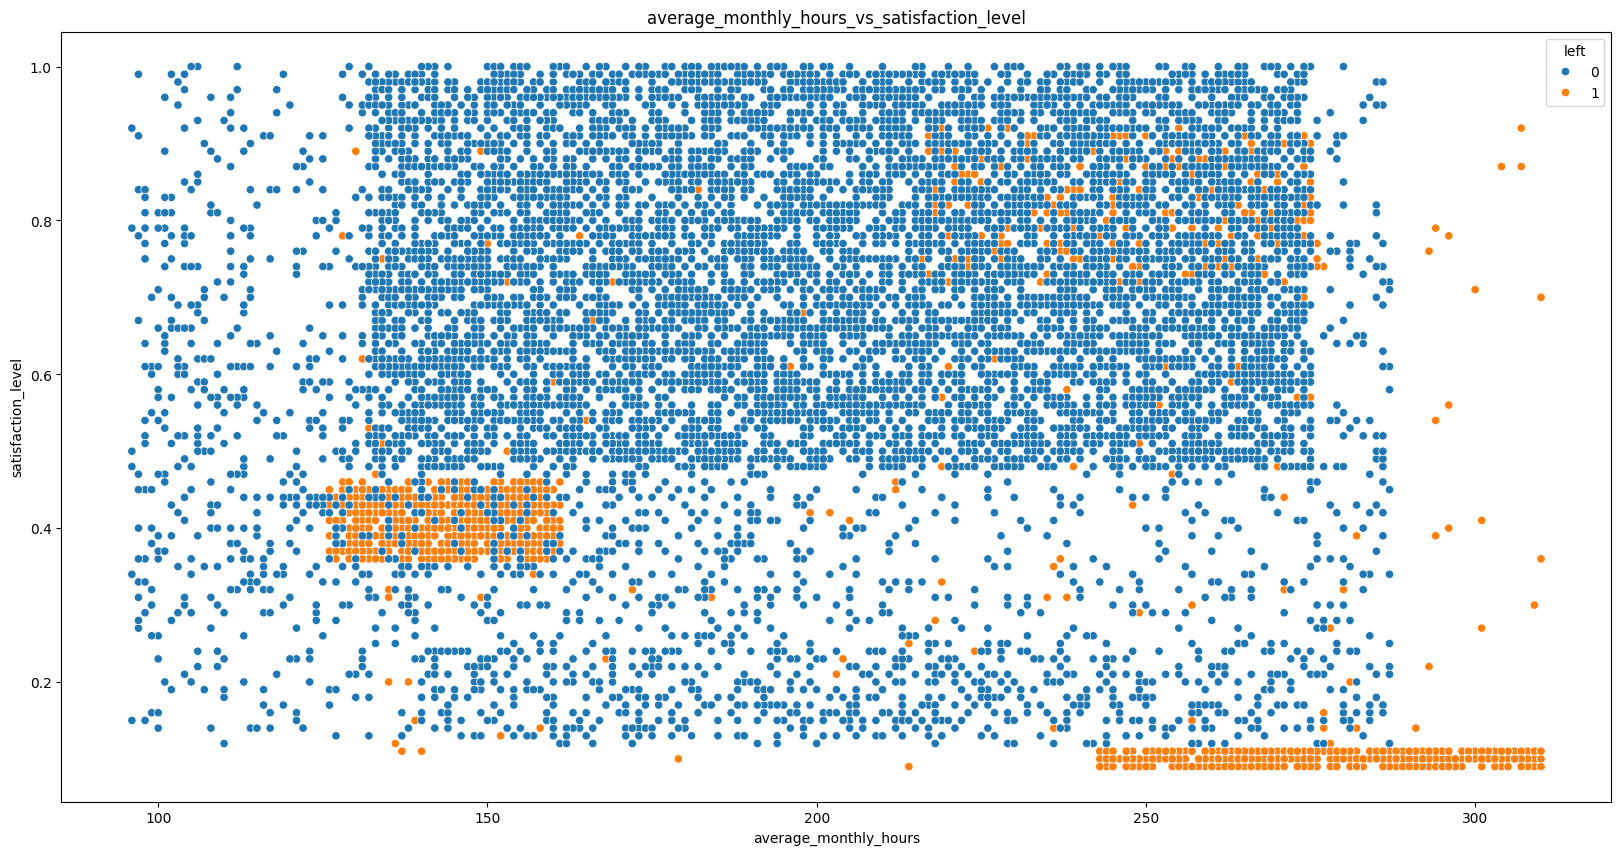

In [26]:
# Create a plot as needed
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'average_monthly_hours', y= 'satisfaction_level', data=df, hue='left')

plt.title('average_monthly_hours_vs_satisfaction_level')


Text(0.5, 1.0, 'average_monthly_hours_vs_last_evaluation')

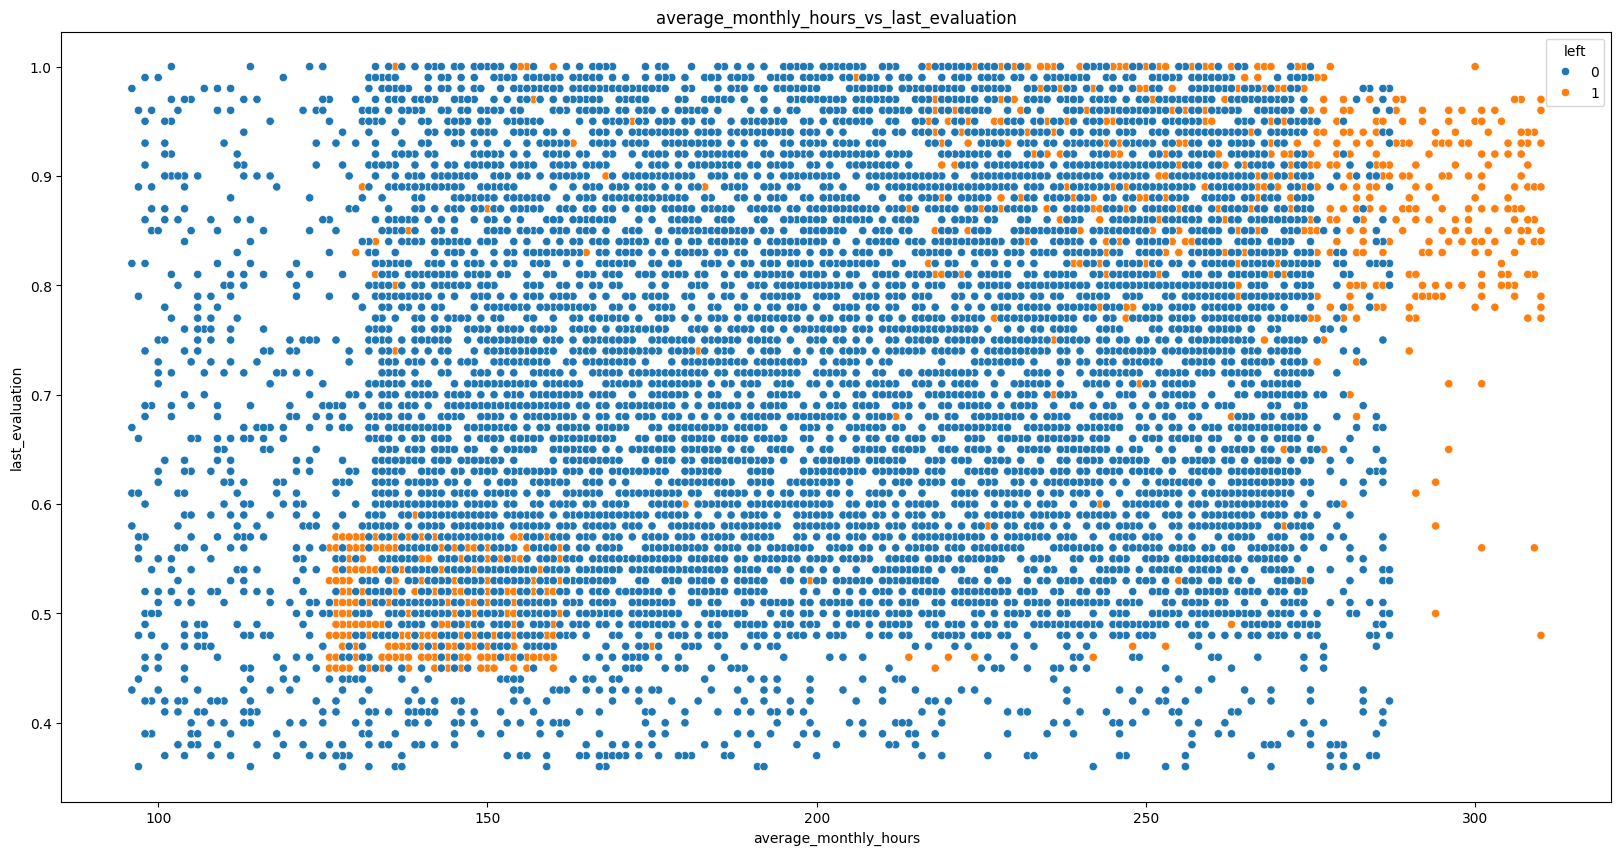

In [27]:
# Create a plot as needed
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'average_monthly_hours', y= 'last_evaluation', data=df, hue='left')

plt.title('average_monthly_hours_vs_last_evaluation')

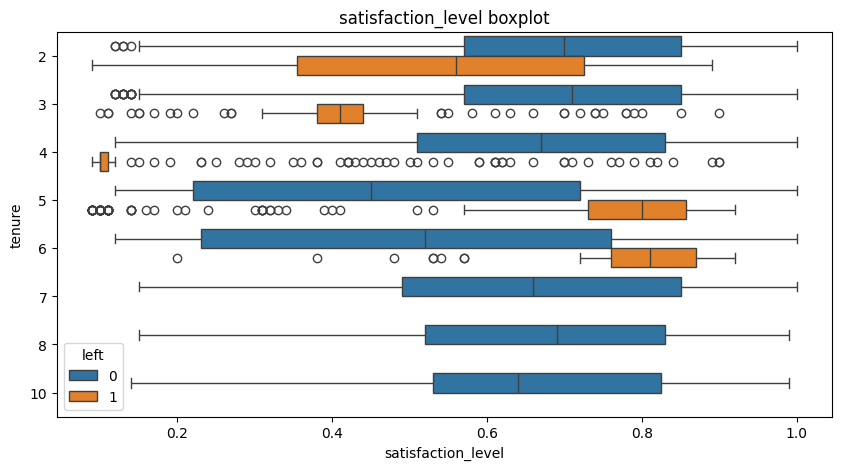

In [28]:
boxplotter('satisfaction_level', data=df, y='tenure', hue='left', orient='h')

Median: 3.0


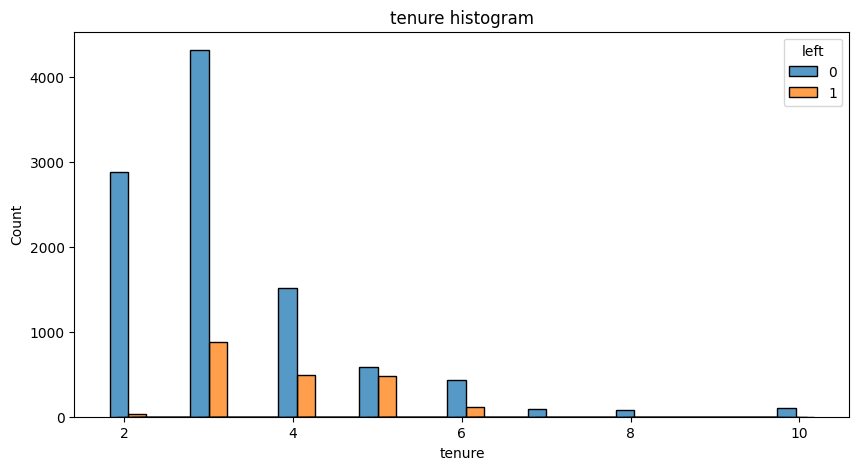

In [29]:
histogrammer('tenure', hue='left', data=df, multiple='dodge', shrink=5)

Median: 3.0


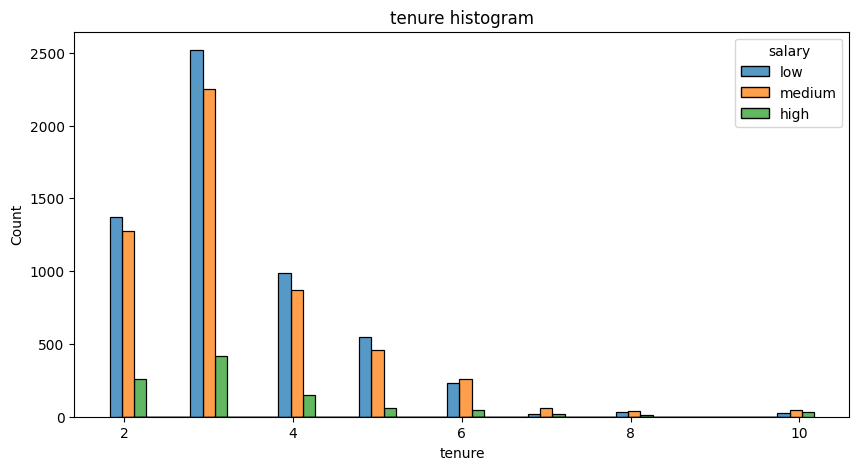

In [30]:
histogrammer('tenure', hue='salary', data=df, multiple='dodge', shrink=5)

<Axes: xlabel='average_monthly_hours', ylabel='promotion_last_5years'>

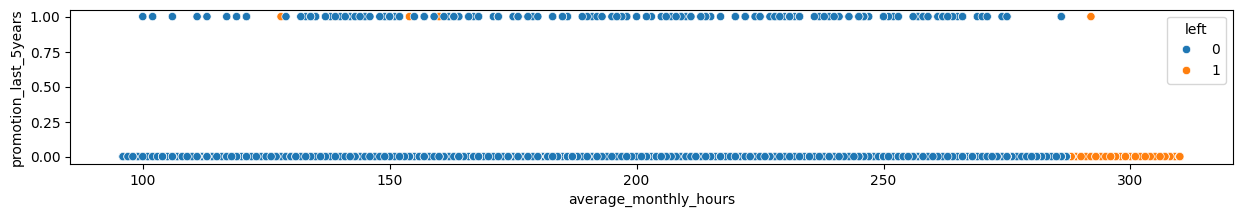

In [31]:
plt.figure(figsize=(15,2))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left')

<Axes: xlabel='department', ylabel='Count'>

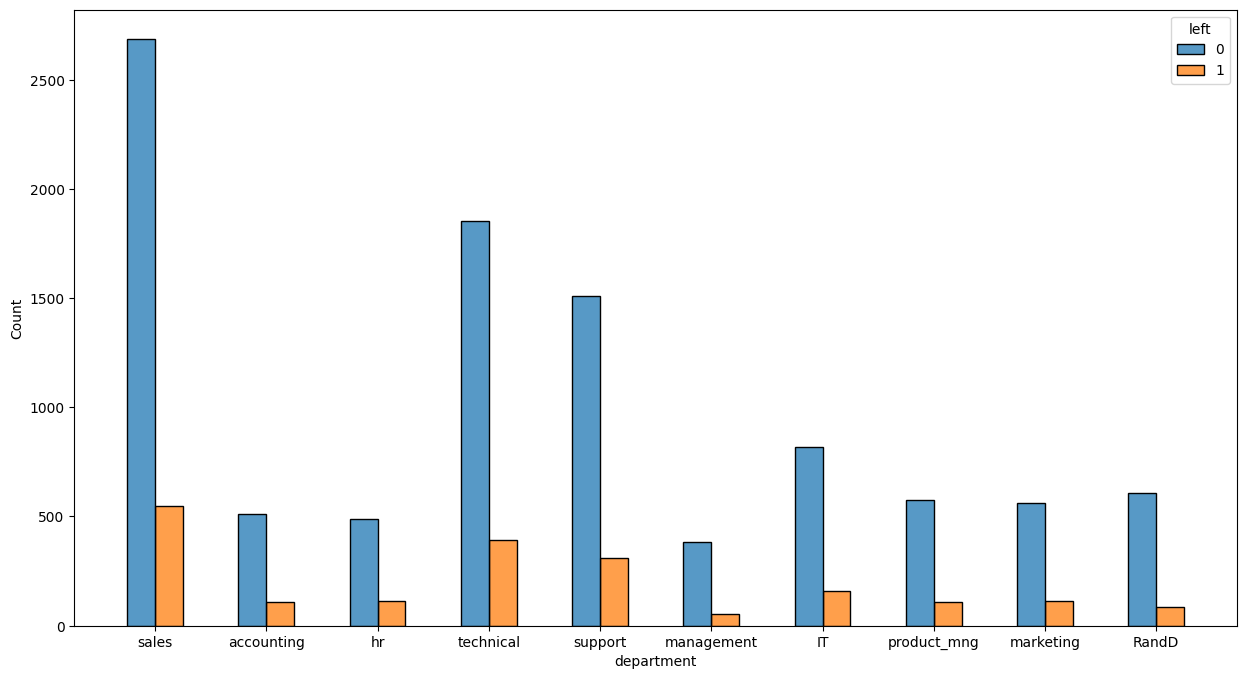

In [32]:

plt.figure(figsize=(15,8))
sns.histplot(x='department', hue='left', data=df, discrete=1, multiple='dodge', shrink=.5)

### Insights

1. 
The employees who left the company tended to have lower satisfaction levels than the employees who stayed in the company.
The lowest satisfaction level scores were more likely given by the employees who have left the company, but we still see numbers of stayed employees given very low satisfaction scores.
The employees who left the company had a similar but an average higher score in the last performance than the employees who stayed in the company.
When the employees only have 2 projects, the possibilities of turnover are the most compared to other numbers of projects. When the employees have 3 projects, the possibilities of turnover is smallest. When project number goes higher, the chance of turnover goes higher, at the same time, the possibilities of stay decreases. In addition, all the employees are left when they have 7 projects.
The employees who left the company had more average monthly work hours than the employees who stayed in the company.
The employees who work in the company longer tend to have more possibilities of leaving.
The employees who didn't experience an accident while at work have more possibilities of staying in the company.
The employees who were promoted in the last 5 years had more possibilities to stay in the company.
The department of management has the lowest number of leaving, and the sales department has the highest number of leaving, compared to other departments in the dataset.
When the salary level goes up, the possibility of leaving is decreased. At the same time, the possibility of staying in the company has also decreased.
satisfaction_level has more relationship with left, compared to other variables. In addition, there are no variables that are highly related to other variables.

2. 
We see the lowest satisfaction level is below 0.1, and it has a large number of employees who had the similar rate. Other than that, there are also a large number of the employees who had a satisfaction level higher than 0.56.
By checking the average_monthly_hour, we see 96 was the minimum monthly working hour, and 310 was the maximum monthly working hour. 149 and 156 are the most frequent monthly working hours.
There is a 63% of employees who work over 176 hours/month.
The percentage of employee who worked over 176 hours/month and left the company is around 14.56%

3. 
We have encoded department and salary to dummy variables since they are caterical variables.

4. 
To understand which variables are present in the data
To consider the distribution of features, such as minimum, mean, and maximum values
To plot the relationship between the independent and dependent variables and visualize which features have a linear relationship
To identify issues with the data, such as incorrect or missing values.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal in this project is to find whether or not an employee will leave the company.

### Identify the types of models most appropriate for this task.

we are able to compare 4 models, Log Regression, Decision tree classification, Random forest classification, and XGBoost classification, we have to modify tenure feature due to the log regression is sensible to outliers. other tahn that we have only to encode features to have categories instead of 'strings'.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [33]:
#Convert salary to hierarchical category
df_enc = df.copy()
df_enc['salary'] = np.where(df_enc['salary']=='low', 0, np.where(df_enc['salary']=='medium', 1, 2))

# Display the new dataframe
df_enc.head(20)

satisfaction_level  last_evaluation  number_project  \
0                 0.38             0.53               2   
1                 0.80             0.86               5   
2                 0.11             0.88               7   
3                 0.72             0.87               5   
4                 0.37             0.52               2   
5                 0.41             0.50               2   
6                 0.10             0.77               6   
7                 0.92             0.85               5   
8                 0.89             1.00               5   
9                 0.42             0.53               2   
10                0.45             0.54               2   
11                0.11             0.81               6   
12                0.84             0.92               4   
13                0.41             0.55               2   
14                0.36             0.56               2   
15                0.38             0.54               2   
16                0.45             0.47               2   
17                0.78             0.99               4   
18                0.45             0.51               2   
19                0.76             0.89               5   

    average_monthly_hours  tenure  work_accident  left  promotion_last_5years  \
0                     157       3              0     1                      0   
1                     262       6              0     1                      0   
2                     272       4              0     1                      0   
3                     223       5              0     1                      0   
4                     159       3              0     1                      0   
5                     153       3              0     1                      0   
6                     247       4              0     1                      0   
7                     259       5              0     1                      0   
8                     224       5              0     1                      0   
9                     142       3              0     1                      0   
10                    135       3              0     1                      0   
11                    305       4              0     1                      0   
12                    234       5              0     1                      0   
13                    148       3              0     1                      0   
14                    137       3              0     1                      0   
15                    143       3              0     1                      0   
16                    160       3              0     1                      0   
17                    255       6              0     1                      0   
18                    160       3              1     1                      1   
19                    262       5              0     1                      0   

   department  salary  
0       sales       0  
1       sales       1  
2       sales       1  
3       sales       0  
4       sales       0  
5       sales       0  
6       sales       0  
7       sales       0  
8       sales       0  
9       sales       0  
10      sales       0  
11      sales       0  
12      sales       0  
13      sales       0  
14      sales       0  
15      sales       0  
16      sales       0  
17      sales       0  
18      sales       0  
19      sales       0

In [34]:
deps = pd.DataFrame(df['department'])
deps.isna().sum()

department    0
dtype: int64

In [35]:
deps= pd.get_dummies(deps, drop_first=False, dtype =int)
deps

department_IT  department_RandD  department_accounting  department_hr  \
0                  0                 0                      0              0   
1                  0                 0                      0              0   
2                  0                 0                      0              0   
3                  0                 0                      0              0   
4                  0                 0                      0              0   
...              ...               ...                    ...            ...   
11995              0                 0                      0              0   
11996              0                 0                      0              0   
11997              0                 0                      0              0   
11998              0                 0                      0              0   
11999              1                 0                      0              0   

       department_management  department_marketing  department_product_mng  \
0                          0                     0                       0   
1                          0                     0                       0   
2                          0                     0                       0   
3                          0                     0                       0   
4                          0                     0                       0   
...                      ...                   ...                     ...   
11995                      1                     0                       0   
11996                      1                     0                       0   
11997                      1                     0                       0   
11998                      0                     1                       0   
11999                      0                     0                       0   

       department_sales  department_support  department_technical  
0                     1                   0                     0  
1                     1                   0                     0  
2                     1                   0                     0  
3                     1                   0                     0  
4                     1                   0                     0  
...                 ...                 ...                   ...  
11995                 0                   0                     0  
11996                 0                   0                     0  
11997                 0                   0                     0  
11998                 0                   0                     0  
11999                 0                   0                     0  

[11991 rows x 10 columns]

In [36]:
df_enc = pd.get_dummies(data=df_enc, columns=['department'], drop_first=False, dtype =int)
df_enc.head(20)

satisfaction_level  last_evaluation  number_project  \
0                 0.38             0.53               2   
1                 0.80             0.86               5   
2                 0.11             0.88               7   
3                 0.72             0.87               5   
4                 0.37             0.52               2   
5                 0.41             0.50               2   
6                 0.10             0.77               6   
7                 0.92             0.85               5   
8                 0.89             1.00               5   
9                 0.42             0.53               2   
10                0.45             0.54               2   
11                0.11             0.81               6   
12                0.84             0.92               4   
13                0.41             0.55               2   
14                0.36             0.56               2   
15                0.38             0.54               2   
16                0.45             0.47               2   
17                0.78             0.99               4   
18                0.45             0.51               2   
19                0.76             0.89               5   

    average_monthly_hours  tenure  work_accident  left  promotion_last_5years  \
0                     157       3              0     1                      0   
1                     262       6              0     1                      0   
2                     272       4              0     1                      0   
3                     223       5              0     1                      0   
4                     159       3              0     1                      0   
5                     153       3              0     1                      0   
6                     247       4              0     1                      0   
7                     259       5              0     1                      0   
8                     224       5              0     1                      0   
9                     142       3              0     1                      0   
10                    135       3              0     1                      0   
11                    305       4              0     1                      0   
12                    234       5              0     1                      0   
13                    148       3              0     1                      0   
14                    137       3              0     1                      0   
15                    143       3              0     1                      0   
16                    160       3              0     1                      0   
17                    255       6              0     1                      0   
18                    160       3              1     1                      1   
19                    262       5              0     1                      0   

    salary  department_IT  department_RandD  department_accounting  \
0        0              0                 0                      0   
1        1              0                 0                      0   
2        1              0                 0                      0   
3        0              0                 0                      0   
4        0              0                 0                      0   
5        0              0                 0                      0   
6        0              0                 0                      0   
7        0              0                 0                      0   
8        0              0                 0                      0   
9        0              0                 0                      0   
10       0              0                 0                      0   
11       0              0                 0                      0   
12       0              0                 0                      0   
13       0              0                 0                      0   
14       0  

In [37]:
df['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [38]:
df_enc['salary'].value_counts()

salary
0    5740
1    5261
2     990
Name: count, dtype: int64

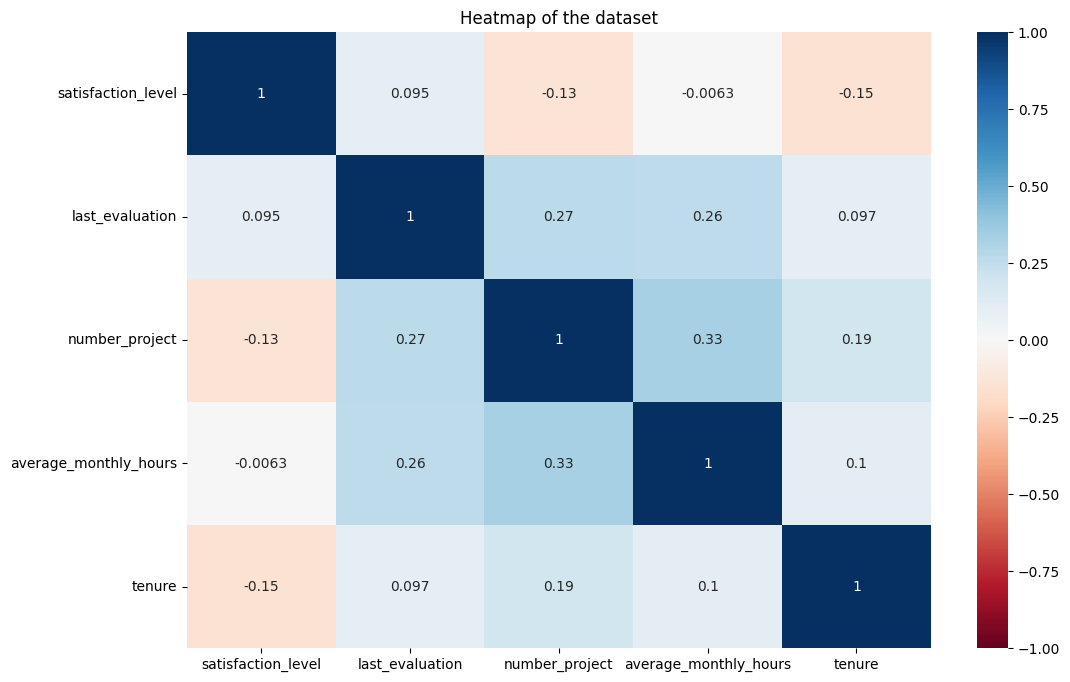

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True,vmax=1, vmin=-1, cmap="RdBu")
plt.title('Heatmap of the dataset')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

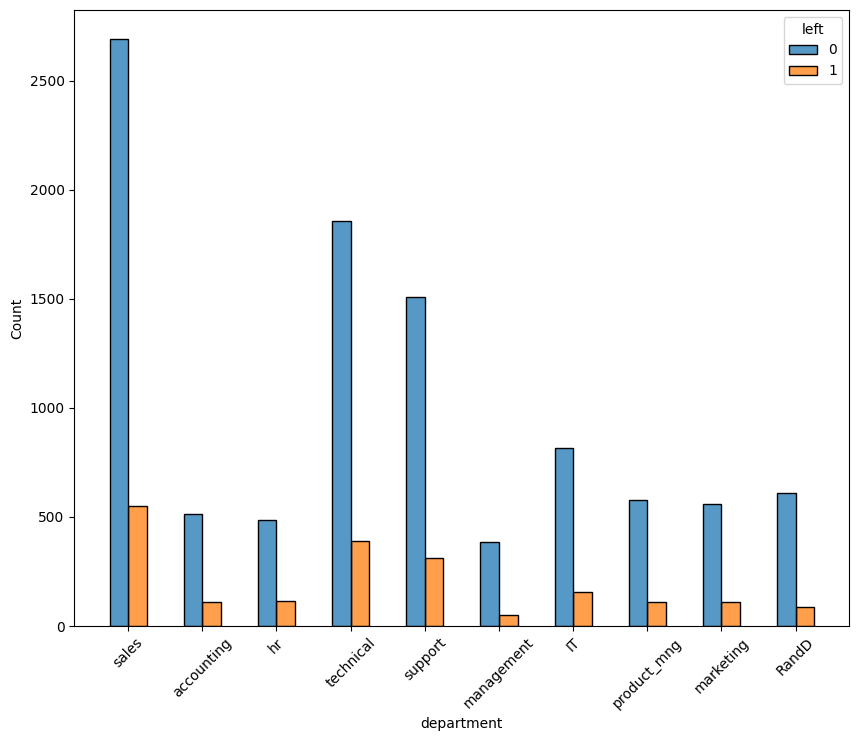

In [40]:
plt.figure(figsize=(10,8))
sns.histplot(x='department', hue='left', data = df, multiple='dodge', shrink=.5)
plt.xticks(rotation = 45)


In [41]:
### def make_results() and get_test_scores()
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy','auc': 'mean_test_roc_auc'
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                          })

    return table

In [92]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

#### Logistic Regresion

In [42]:
#Df for logistic regresion without outliers
df_logreg = df_enc[(df_enc['tenure'] >= lw_lim) & (df_enc['tenure'] <= up_lim)]
print(df_logreg.shape)
df_logreg.head()

(11167, 19)


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   
5       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [43]:
y= df_logreg['left']
X = df_logreg.drop('left', axis=1)

In [44]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [45]:
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   
5       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [47]:
Reg_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [48]:
y_preds = Reg_clf.predict(X_test)

In [49]:
Reg_clf.intercept_

array([-1.31546147])

In [50]:
Reg_clf.score(X_test, y_test)

0.8194842406876791

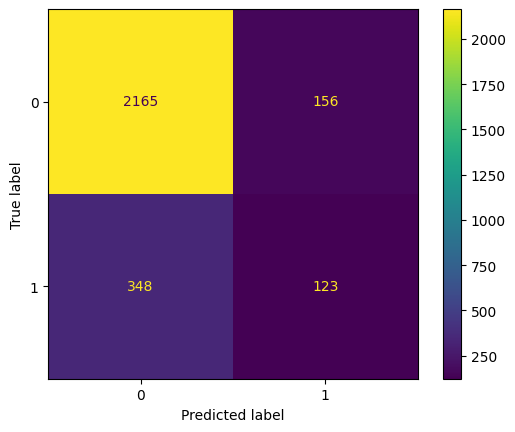

In [51]:
cm = confusion_matrix(y_test, y_preds, labels=Reg_clf.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=Reg_clf.classes_)
disp.plot()

In [52]:
target_names = ['Stayed', 'Left']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

      Stayed       0.86      0.93      0.90      2321
        Left       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



#### Decision Tree 1

In [53]:
y = df_enc['left']
X = df_enc.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# 1. Instantiate the random forest classifier
dstree1 = DecisionTreeClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,6,8,None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6],
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# 4. Instantiate the GridSearchCV object
dstree1_gs = GridSearchCV(dstree1, cv_params, cv=4, scoring=scoring, refit='roc_auc')

In [54]:
dstree1_gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [55]:
dstree1_gs.best_score_

0.969819392792457

In [56]:
dstree1_gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

#### Random forest 1

In [57]:
y = df_enc['left']
X = df_enc.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,6,8,None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6],
             'n_estimators': [300],
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, cv=4, scoring=scoring, refit='roc_auc')


In [58]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [300]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [59]:
rf_cv.best_estimator_

RandomForestClassifier(min_samples_leaf=5, n_estimators=300, random_state=42)

In [60]:
rf_cv.best_score_

0.9800570562907103

In [61]:
rf_cv.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 300}

#### Results 1 attemp

In [62]:
make_results('Decision Tree 1', dstree1_gs, 'auc')

model  precision    recall        F1  accuracy       auc
0  Decision Tree 1   0.914552  0.916949  0.915707  0.971978  0.969819

In [63]:
make_results('RF1', rf_cv, 'auc')

model  precision    recall        F1  accuracy       auc
0   RF1    0.98183  0.904225  0.941411  0.981319  0.980057

In [64]:
get_scores('Decision Tree 1', dstree1_gs, X_test, y_test)

model  precision    recall        f1  accuracy       AUC
0  Decision Tree 1   0.936214  0.913655  0.924797  0.975317  0.950627

In [65]:
get_scores('RF1', rf_cv, X_test, y_test)

model  precision    recall        f1  accuracy       AUC
0   RF1   0.982533  0.903614  0.941423  0.981321  0.950207

In [66]:
df_2nd_try = df_enc.drop('satisfaction_level', axis=1)

In [67]:
df_2nd_try['overworked'] = df_2nd_try['average_monthly_hours']

In [68]:
df_2nd_try['overworked'] = (df_2nd_try['overworked'] > 170).astype(int)
df_2nd_try

last_evaluation  number_project  average_monthly_hours  tenure  \
0                 0.53               2                    157       3   
1                 0.86               5                    262       6   
2                 0.88               7                    272       4   
3                 0.87               5                    223       5   
4                 0.52               2                    159       3   
...                ...             ...                    ...     ...   
11995             0.55               3                    259      10   
11996             0.95               5                    266      10   
11997             0.54               3                    185      10   
11998             0.65               3                    172      10   
11999             0.73               4                    180       3   

       work_accident  left  promotion_last_5years  salary  department_IT  \
0                  0     1                      0       0              0   
1                  0     1                      0       1              0   
2                  0     1                      0       1              0   
3                  0     1                      0       0              0   
4                  0     1                      0       0              0   
...              ...   ...                    ...     ...            ...   
11995              1     0                      1       2              0   
11996              0     0                      1       2              0   
11997              0     0                      1       2              0   
11998              0     0                      1       2              0   
11999              0     0                      0       0              1   

       department_RandD  department_accounting  department_hr  \
0                     0                      0              0   
1                     0                      0              0   
2                     0                      0              0   
3                     0                      0              0   
4                     0                      0              0   
...                 ...                    ...            ...   
11995                 0                      0              0   
11996                 0                      0              0   
11997                 0                      0              0   
11998                 0                      0              0   
11999                 0                      0              0   

       department_management  department_marketing  department_product_mng  \
0                          0                     0                       0   
1                          0                     0                       0   
2                          0                     0                       0   
3                          0                     0                       0   
4                          0                     0                       0   
...                      ...                   ...                     ...   
11995                      1                     0                       0   
11996                      1                     0                       0   
11997                      1                     0                       0   
11998                      0                     1                       0   
11999                      0                     0                       0   

       department_sales  department_support  department_technical  overworked  
0                     1                   0                     0           0  
1                     1                   0                     0           1  
2                     1                   0                     0           1  
3                     1                   0                     0           1  
4                     1                   0                     0           0  
...                

In [69]:
df_2nd_try = df_2nd_try.drop('average_monthly_hours', axis=1)
df_2nd_try.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           1  
2                   0                     0           1  
3                   0                     0           1  
4                   0                     0           0

#### Desicion Tree 2

In [70]:
y = df_2nd_try['left']
X = df_2nd_try.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# 1. Instantiate the random forest classifier
dstree2 = DecisionTreeClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,6,8,None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6],
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# 4. Instantiate the GridSearchCV object
dstree2_gs = GridSearchCV(dstree2, cv_params, cv=4, scoring=scoring, refit='roc_auc')

In [71]:
dstree2_gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [72]:
dstree2_gs.best_score_

0.957826268679541

In [73]:
dstree2_gs.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

#### Random forest 2

In [74]:
y = df_2nd_try['left']
X = df_2nd_try.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# 1. Instantiate the random forest classifier
rf2 = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,6,8,None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6],
             'n_estimators': [300,500],
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# 4. Instantiate the GridSearchCV object
rf2_cv = GridSearchCV(rf2, cv_params, cv=4, scoring=scoring, refit='roc_auc')

In [75]:
rf2_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [76]:
rf2_cv.best_score_

0.9689713757986743

In [77]:
rf2_cv.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 300}

#### XGBoost

In [104]:
y = df_2nd_try['left']
X = df_2nd_try.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# 1. Instantiate the random forest classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, cv=4, scoring=scoring, refit='roc_auc')

In [105]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [99]:
xgb_cv.best_score_

0.9638992592698792

In [106]:
xgb_cv.best_score_

0.9728493025189602

In [100]:
xgb_cv.best_params_

{'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [107]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 500}

#### Results 2 attemp

In [78]:
make_results('Decision Tree 2', dstree2_gs, 'auc')

model  precision    recall       F1  accuracy       auc
0  Decision Tree 2   0.858261  0.900202  0.87838  0.958523  0.957826

In [79]:
make_results('Random Fores 2', rf2_cv, 'auc')

model  precision    recall        F1  accuracy       auc
0  Random Fores 2   0.914903  0.864036  0.888706  0.964084  0.968971

In [108]:
make_results('XGB_class', xgb_cv, 'auc')

model  precision    recall        F1  accuracy       auc
0  XGB_class   0.904428  0.887478  0.895852  0.965751  0.972849

In [115]:
results = get_scores('Decision Tree 2', dstree2_gs, X_test, y_test)
results

model  precision    recall        f1  accuracy       AUC
0  Decision Tree 2   0.778157  0.915663  0.841328  0.942628  0.931831

In [116]:
resultsrf2 = get_scores('Random Fores 2', rf2_cv, X_test, y_test)
results = pd.concat([results, resultsrf2], axis=0)
results


model  precision    recall        f1  accuracy       AUC
0  Decision Tree 2   0.778157  0.915663  0.841328  0.942628  0.931831
0   Random Fores 2   0.912317  0.877510  0.894575  0.965644  0.930355

In [117]:
resultsxgb = get_scores('XGB_class', xgb_cv, X_test, y_test)
results = pd.concat([results, resultsxgb], axis=0)
results

model  precision    recall        f1  accuracy       AUC
0  Decision Tree 2   0.778157  0.915663  0.841328  0.942628  0.931831
0   Random Fores 2   0.912317  0.877510  0.894575  0.965644  0.930355
0        XGB_class   0.890220  0.895582  0.892893  0.964310  0.936791

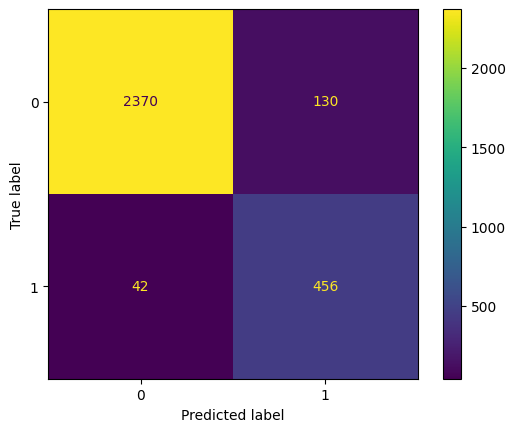

In [82]:
preds_dstree2 = dstree2_gs.best_estimator_.predict(X_test)
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds_dstree2, labels=dstree2_gs.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dstree2_gs.classes_)
disp.plot()

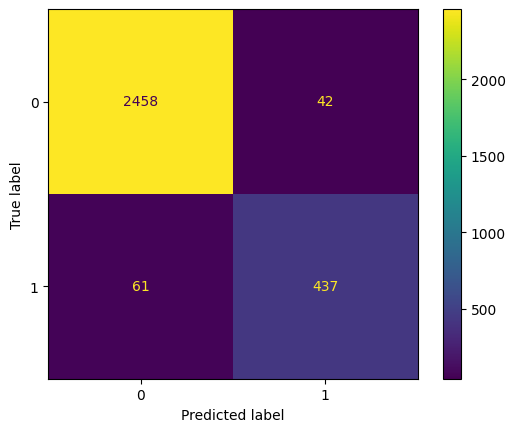

In [83]:
preds_rf2 = rf2_cv.best_estimator_.predict(X_test)
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds_rf2, labels=rf2_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2_cv.classes_)
disp.plot()

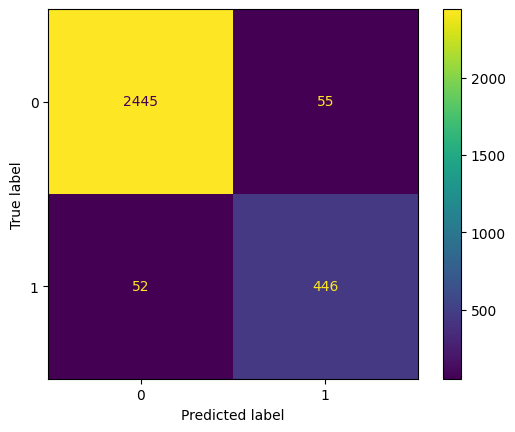

In [110]:
preds_xgb = xgb_cv.best_estimator_.predict(X_test)
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds_xgb, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_cv.classes_)
disp.plot()

In [88]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
dstree2_gs_importances = pd.DataFrame(dstree2_gs.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
dstree2_gs_importances = dstree2_gs_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
dstree2_gs_importances = dstree2_gs_importances[dstree2_gs_importances['gini_importance'] != 0]
dstree2_gs_importances

gini_importance
last_evaluation              0.344443
number_project               0.344235
tenure                       0.214936
overworked                   0.093587
department_technical         0.001179
department_sales             0.000626
department_support           0.000418
work_accident                0.000183
salary                       0.000173
department_IT                0.000141
department_marketing         0.000078

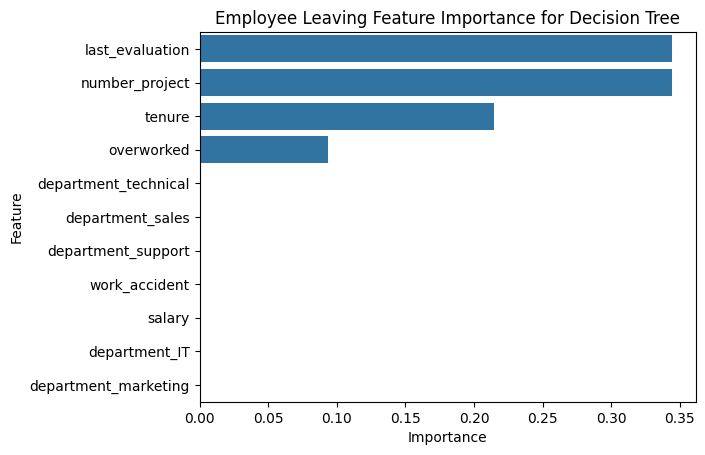

In [89]:
sns.barplot(data=dstree2_gs_importances, x="gini_importance", y=dstree2_gs_importances.index, orient='h')
plt.title("Employee Leaving Feature Importance for Decision Tree", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

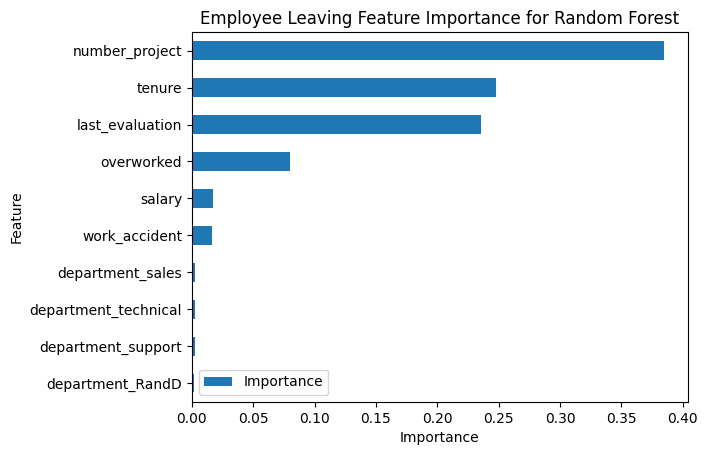

In [90]:
# Get feature importances
feat_impt = rf2_cv.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2_cv.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Employee Leaving Feature Importance for Random Forest", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

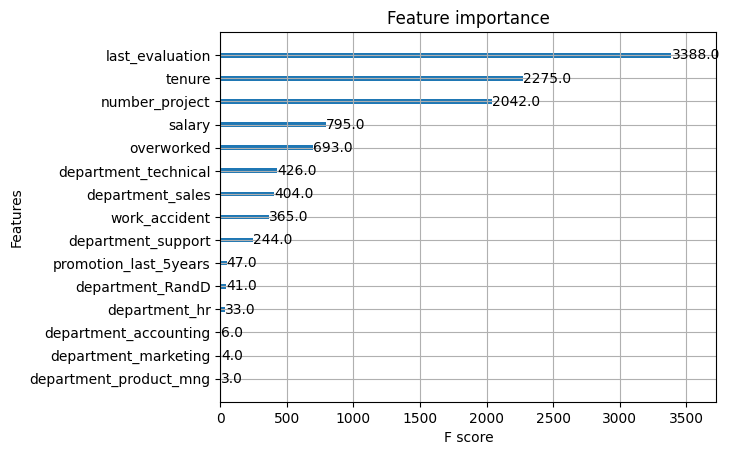

In [112]:
plot_importance(xgb_cv.best_estimator_)

Text(0.5, 1.0, 'Precision-recall curve, XGBoost model')

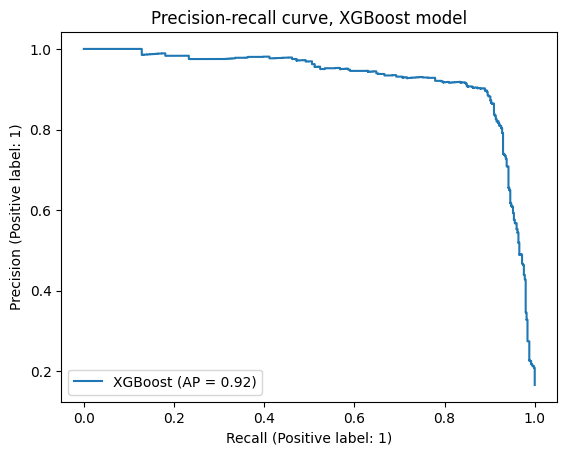

In [113]:
from sklearn.metrics import PrecisionRecallDisplay
# Plot precision-recall curve
display = PrecisionRecallDisplay.from_estimator(
    xgb_cv.best_estimator_, X_test, y_test, name='XGBoost'
    )
plt.title('Precision-recall curve, XGBoost model')

In [93]:
write_pickle('./', rf2_cv, 'rf2_cv')

In [94]:
write_pickle('./', dstree2_gs, 'dstree2_gs')

In [114]:
write_pickle('./', xgb_cv, 'xgb_cv')

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Precision: The XGBoost model's precision is 89.02%. This means that out of all the positive predictions made by the model, 89.02% are actually positive.

    Recall: The XGBoost model's recall is 89.56%. This indicates that the model can correctly identify 89.56% of all positive cases in the data.

    F1-Score: The XGBoost model's F1-score is 89.29%. The F1-score is a metric that combines precision and recall into a single value. It is useful when seeking a balance between precision and recall.

    Accuracy: The XGBoost model's accuracy is 96.43%. This indicates the proportion of correct predictions relative to the total predictions made by the model.

    Area Under the ROC Curve (AUC): The XGBoost model's Area Under the ROC Curve is 93.68%. This metric provides a measure of the model's discriminative ability to distinguish between the positive and negative classes. AUC values close to 1 indicate a model with good performance in classification. In this case, 93.68% is a good result.

    In summary, the results suggest that the XGBoost model performs well in terms of precision, recall, F1-score, accuracy, and Area Under the ROC Curve, indicating a solid ability to correctly classify the data.

2. According to the importance of the features it is important to see which features have the highest cost to improve and act in base of this.

3. Based on the results of the models, the reccomendation is to consider the features (last_evaluation, number_project, tenure, overworked,	salary) the properly importance, because all the models agree to find these features are highly determinant in the stay/resign decision.

4. Of course the model was trained only with the available data so, if there is any other features that can be maesured it will bue useful to improve its performance, so the recommendation is to get more features as possible.

5. There are some questions that can be useful to gain some information, how is determined the number of projects where employees can participate?, how do employees can be promoted? 

6. There is something really good, the data is no related no any particular person so there is no issue treating with people identity.


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

In [118]:
results

model  precision    recall        f1  accuracy       AUC
0  Decision Tree 2   0.778157  0.915663  0.841328  0.942628  0.931831
0   Random Fores 2   0.912317  0.877510  0.894575  0.965644  0.930355
0        XGB_class   0.890220  0.895582  0.892893  0.964310  0.936791

Based on the results of the models results, the appropiate model to use could be random forrest or XGB, the difference is in the precision and recall, random forest has better precision, but XGBoost has better recall.
For this specific usecase, we can use any of them, both have a good performance, but it will be good to have more information about employees to analyze.

### Conclusion, Recommendations, Next Steps

The models and feature importance analysis derived from these models affirm the notion that employees within the company are experiencing excessive workloads.

To retain employees, the following recommendations could be proposed to the stakeholders:

* Implement a cap on the number of projects that employees can simultaneously be in.
* Explore the possibility of promoting employees who have completed a minimum of four years with the company, or conduct further investigations to understand the dissatisfaction among employees with four years of tenure.
* Consider incentivizing employees for working extended hours or reevaluate the necessity of long working hours.
* Ensure that employees are well-informed about the company's policies regarding overtime pay. Clarify expectations regarding workload and time off.
* Issue open discussions at both company-wide and team levels to comprehend and address underlying issues in the company's work culture and work ambient.
* Reassess the evaluation criteria to ensure that high performance ratings are not solely reserved for employees who work exceptionally long hours. Adopt a more proportional approach to recognize and reward employees based on their contributions and efforts.

If evaluations occur infrequently, it could be beneficial to develop models for predicting employee retention without relying on this feature. Conversely, if the evaluation score significantly influences employee retention, it might be worthwhile to shift focus towards predicting performance scores or satisfaction scores instead.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.